In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


In [5]:
import pandas as pd
import numpy as np
import random

def generate_transaction_data(num_steps, fraud_rate, amount_min, amount_max, balance_min, balance_max):
    data = []
    for step in range(1, num_steps + 1):
        type_options = ['CASH-IN', 'CASH-OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
        transaction_type = random.choice(type_options)

        name_orig = 'customer_' + str(random.randint(1, 1000))
        amount = np.random.uniform(amount_min, amount_max)
        old_balance_org = np.random.uniform(balance_min, balance_max)
        new_balance_org = old_balance_org + (amount if transaction_type == 'CASH-IN' else -amount)

        name_dest = 'customer_' + str(random.randint(1, 1000))
        old_balance_dest = np.random.uniform(balance_min, balance_max)
        new_balance_dest = old_balance_dest + amount if transaction_type == 'TRANSFER' else old_balance_dest

        is_fraud = True if random.random() < fraud_rate else False
        is_flagged_fraud = amount > 200000  # Adjust threshold as needed

        data.append({
            'step': step,
            'type': transaction_type,
            'amount': amount,
            'nameOrig': name_orig,
            'oldbalanceOrg': old_balance_org,
            'newbalanceOrg': new_balance_org,
            'nameDest': name_dest,
            'oldbalanceDest': old_balance_dest,
            'newbalanceDest': new_balance_dest,
            'isFraud': is_fraud,
            'isFlaggedFraud': is_flagged_fraud
        })

    return pd.DataFrame(data)

# Define ranges and distributions
amount_min = 10
amount_max = 1000
balance_min = 0
balance_max = 10000
fraud_rate = 0.02
num_steps = 744  # Adjust as needed

# Generate data
df = generate_transaction_data(num_steps, fraud_rate, amount_min, amount_max, balance_min, balance_max)

# Save to CSV file
df.to_csv('fraud_detection_data.csv', index=False)

# Read from CSV file
loaded_data = pd.read_csv('fraud_detection_data.csv')
print(loaded_data)


     step      type      amount      nameOrig  oldbalanceOrg  newbalanceOrg  \
0       1   CASH-IN  817.798994  customer_890    7565.957511    8383.756504   
1       2   CASH-IN   54.136694   customer_22    5326.622304    5380.758999   
2       3  TRANSFER  431.674499  customer_369    7333.168370    6901.493871   
3       4     DEBIT   44.140592  customer_965    4542.599178    4498.458586   
4       5   CASH-IN  538.660229  customer_688     374.790515     913.450744   
..    ...       ...         ...           ...            ...            ...   
739   740   CASH-IN  226.961005  customer_785    4190.572468    4417.533474   
740   741  TRANSFER  780.656193  customer_247     431.452049    -349.204143   
741   742     DEBIT  416.027622  customer_244    5015.852526    4599.824903   
742   743  CASH-OUT  304.817062  customer_121    6143.851336    5839.034274   
743   744  TRANSFER  694.660845  customer_416    8262.184949    7567.524104   

         nameDest  oldbalanceDest  newbalanceDest  

             step      amount  oldbalanceOrg  newbalanceOrg  oldbalanceDest  \
count  744.000000  744.000000     744.000000     744.000000      744.000000   
mean   372.500000  523.265464    4851.537848    4565.555074     4912.091782   
std    214.918589  280.440552    2818.440385    2856.575910     2783.617243   
min      1.000000   11.061145       1.624337    -788.239639        2.662182   
25%    186.750000  279.744332    2563.210359    2158.036479     2587.039168   
50%    372.500000  533.444459    4789.723910    4499.353910     4917.671335   
75%    558.250000  759.403743    7117.263301    6911.728344     7033.755360   
max    744.000000  997.638147    9999.023669   10493.273178     9999.289207   

       newbalanceDest  
count      744.000000  
mean      5016.503039  
std       2787.065244  
min          2.771692  
25%       2703.907489  
50%       5134.088786  
75%       7230.069282  
max      10624.048320  
step              0
type              0
amount            0
nameOrig    

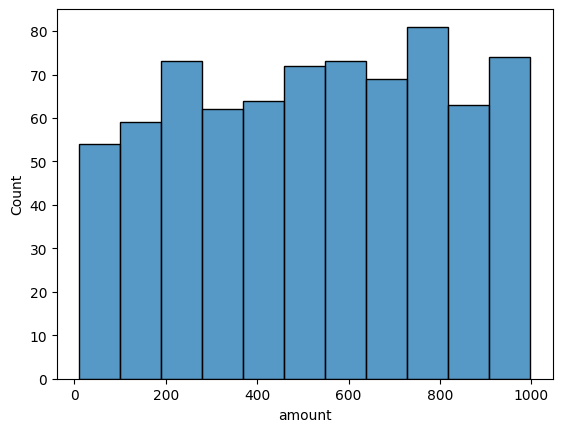

In [7]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

def generate_transaction_data(num_steps, fraud_rate, amount_min, amount_max, balance_min, balance_max):
    data = []
    for step in range(1, num_steps + 1):
        type_options = ['CASH-IN', 'CASH-OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
        transaction_type = random.choice(type_options)

        name_orig = 'customer_' + str(random.randint(1, 1000))
        amount = np.random.uniform(amount_min, amount_max)
        old_balance_org = np.random.uniform(balance_min, balance_max)
        new_balance_org = old_balance_org + (amount if transaction_type == 'CASH-IN' else -amount)

        name_dest = 'customer_' + str(random.randint(1, 1000))
        old_balance_dest = np.random.uniform(balance_min, balance_max)
        new_balance_dest = old_balance_dest + amount if transaction_type == 'TRANSFER' else old_balance_dest

        is_fraud = True if random.random() < fraud_rate else False
        is_flagged_fraud = amount > 200000  # Adjust threshold as needed

        data.append({
            'step': step,
            'type': transaction_type,
            'amount': amount,
            'nameOrig': name_orig,
            'oldbalanceOrg': old_balance_org,
            'newbalanceOrg': new_balance_org,
            'nameDest': name_dest,
            'oldbalanceDest': old_balance_dest,
            'newbalanceDest': new_balance_dest,
            'isFraud': is_fraud,
            'isFlaggedFraud': is_flagged_fraud
        })

    return pd.DataFrame(data)

# Define ranges and distributions
amount_min = 10
amount_max = 1000
balance_min = 0
balance_max = 10000
fraud_rate = 0.02
num_steps = 744  # Adjust as needed

# Generate data
df = generate_transaction_data(num_steps, fraud_rate, amount_min, amount_max, balance_min, balance_max)

# Save to CSV file
df.to_csv('fraud_detection_data.csv', index=False)

# Read from CSV file
loaded_data = pd.read_csv('fraud_detection_data.csv')

# Get basic statistics
print(loaded_data.describe())

# Identify missing values
print(loaded_data.isnull().sum())

# Visualize distributions
sns.histplot(loaded_data['amount'])
plt.show()



In [9]:
def impute_missing_values(data):
    """
    Impute missing values in the DataFrame using mean for simplicity.

    Parameters:
    - data: pd.DataFrame, input DataFrame with potential missing values.

    Returns:
    - pd.DataFrame, DataFrame with missing values imputed.
    """
    return data.fillna(data.mean())



In [10]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

def generate_transaction_data(num_steps, fraud_rate, amount_min, amount_max, balance_min, balance_max):
    data = []
    for step in range(1, num_steps + 1):
        type_options = ['CASH-IN', 'CASH-OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
        transaction_type = random.choice(type_options)

        name_orig = 'customer_' + str(random.randint(1, 1000))
        amount = np.random.uniform(amount_min, amount_max)
        old_balance_org = np.random.uniform(balance_min, balance_max)
        new_balance_org = old_balance_org + (amount if transaction_type == 'CASH-IN' else -amount)

        name_dest = 'customer_' + str(random.randint(1, 1000))
        old_balance_dest = np.random.uniform(balance_min, balance_max)
        new_balance_dest = old_balance_dest + amount if transaction_type == 'TRANSFER' else old_balance_dest

        is_fraud = True if random.random() < fraud_rate else False
        is_flagged_fraud = amount > 200000  # Adjust threshold as needed

        data.append({
            'step': step,
            'type': transaction_type,
            'amount': amount,
            'nameOrig': name_orig,
            'oldbalanceOrg': old_balance_org,
            'newbalanceOrg': new_balance_org,
            'nameDest': name_dest,
            'oldbalanceDest': old_balance_dest,
            'newbalanceDest': new_balance_dest,
            'isFraud': is_fraud,
            'isFlaggedFraud': is_flagged_fraud
        })

    return pd.DataFrame(data)

def preprocess_data(df):
    # Impute missing values (using mean for simplicity)
    df.fillna(df.mean(), inplace=True)

    # Encode categorical variables using one-hot encoding
    df = pd.get_dummies(df, columns=['type'], drop_first=True)

    return df

# Define ranges and distributions
amount_min = 10
amount_max = 1000
balance_min = 0
balance_max = 10000
fraud_rate = 0.02
num_steps = 744  # Adjust as needed

# Generate data
df = generate_transaction_data(num_steps, fraud_rate, amount_min, amount_max, balance_min, balance_max)

# Save to CSV file
df.to_csv('fraud_detection_data.csv', index=False)

# Read from CSV file
loaded_data = pd.read_csv('fraud_detection_data.csv')

# Preprocess data
processed_data = preprocess_data(loaded_data)

# Display processed data
print(processed_data.head())


   step      amount      nameOrig  oldbalanceOrg  newbalanceOrg      nameDest  \
0     1  979.790248  customer_808    6896.351558    5916.561310  customer_942   
1     2  124.744036  customer_387    4396.707798    4271.963762  customer_475   
2     3  104.375388  customer_501     664.901026     560.525639  customer_955   
3     4  256.903556  customer_576    7666.049074    7409.145518  customer_565   
4     5  700.818514  customer_433    5200.123033    5900.941547  customer_182   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH-OUT  \
0     7050.042617     7050.042617    False           False              0   
1     9577.399515     9702.143551    False           False              0   
2     1127.604888     1231.980275    False           False              0   
3     9014.234740     9271.138296    False           False              0   
4     5548.399504     5548.399504    False           False              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0    

<ipython-input-10-ea86b3e32862>:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


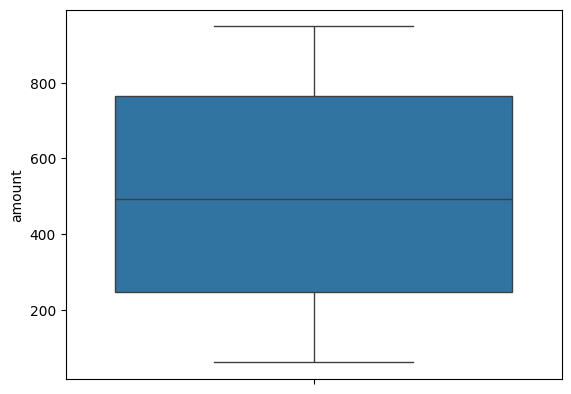

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Visualize outliers
sns.boxplot(processed_data['amount'])
plt.show()

# Winsorize outliers (replace extreme values with upper and lower bounds)
processed_data['amount'] = winsorize(processed_data['amount'], limits=[0.05, 0.05])


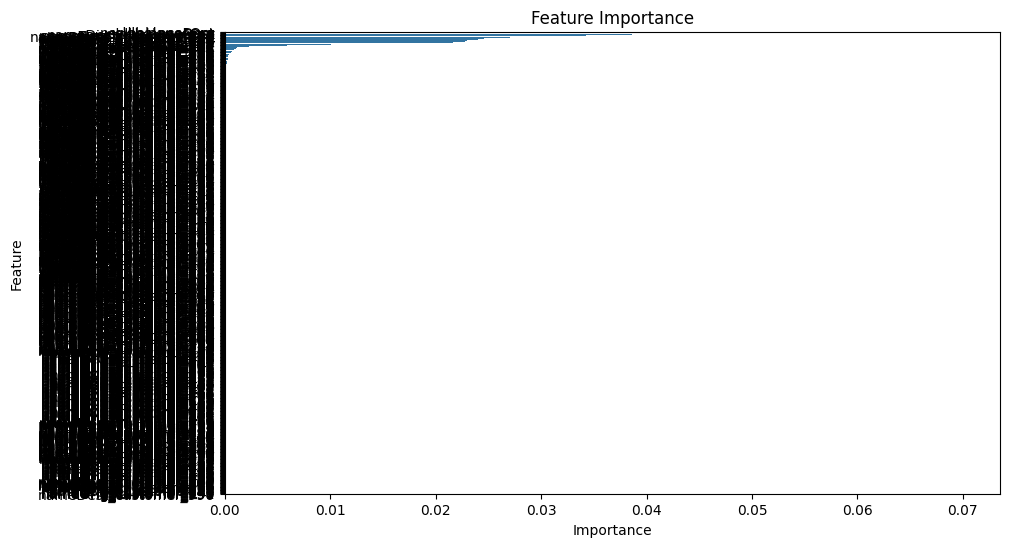

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       149

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149


Confusion Matrix:
[[149]]


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 7.1 Separate Features and Target
X = processed_data.drop(['isFraud'], axis=1)
y = processed_data['isFraud']

# 7.2 One-Hot Encoding for Categorical Features
X = pd.get_dummies(X, drop_first=True)  # Drop_first automatically handles one-hot encoding for all categorical columns

# 7.3 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7.4 Choose and Train Model
# Using RandomForestClassifier as an example. You can replace it with other classifiers.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7.5 Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

# 7.6 Additional Features: Feature Importance Analysis
# For RandomForestClassifier, get feature importance
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)


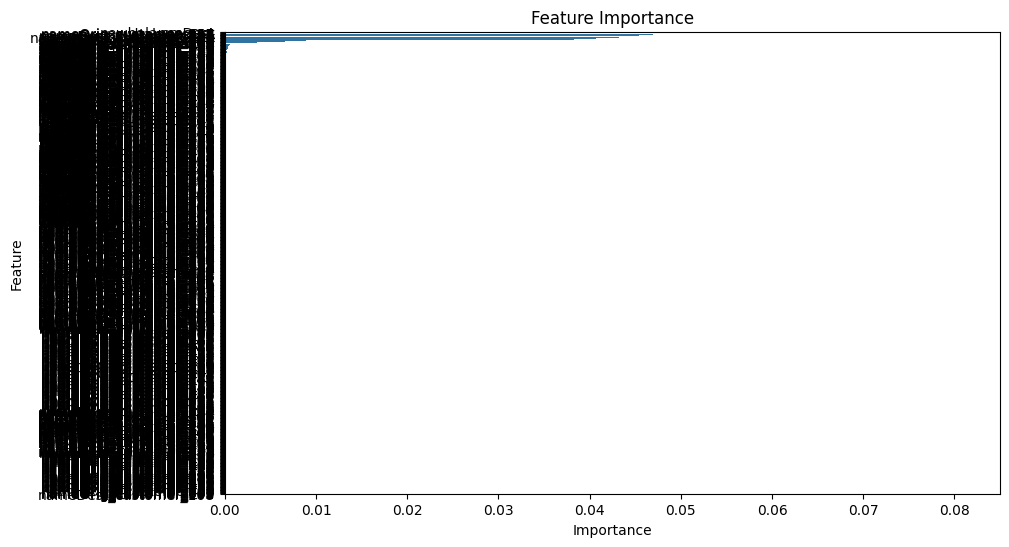

Accuracy on Test Set: 0.9866

Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       147
        True       0.00      0.00      0.00         2

    accuracy                           0.99       149
   macro avg       0.49      0.50      0.50       149
weighted avg       0.97      0.99      0.98       149


Confusion Matrix on Test Set:
[[147   0]
 [  2   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 7.1 Separate Features and Target
X = processed_data.drop(['isFraud'], axis=1)
y = processed_data['isFraud']

# 7.2 One-Hot Encoding for Categorical Features
X = pd.get_dummies(X, drop_first=True)  # Drop_first automatically handles one-hot encoding for all categorical columns

# 7.3 Split Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 7.4 Choose and Train Model
# Using RandomForestClassifier as an example. You can replace it with other classifiers.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7.5 Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# 7.6 Additional Features: Feature Importance Analysis
# For RandomForestClassifier, get feature importance
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Print accuracy and classification report on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.4f}')

print('\nClassification Report on Test Set:')
print(classification_report(y_test, y_pred))

# Confusion Matrix on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix on Test Set:')
print(conf_matrix)


In [19]:
# Step 8: Feature Selection
# Evaluate feature importance
feature_importance = best_model.feature_importances_

# Select relevant features based on importance threshold (e.g., 0.01)
selected_features = X.columns[feature_importance > 0.01]

# Subset the training and test data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 8.1 Re-Train Model with Selected Features
model_selected_features = RandomForestClassifier(random_state=42)
model_selected_features.fit(X_train_selected, y_train)

# Evaluate the model with selected features
y_pred_selected = model_selected_features.predict(X_test_selected)

# 8.2 Print accuracy and classification report for the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy with Selected Features: {accuracy_selected:.4f}')

print('\nClassification Report with Selected Features:')
print(classification_report(y_test, y_pred_selected))

# 8.3 Confusion Matrix for the model with selected features
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
print('\nConfusion Matrix with Selected Features:')
print(conf_matrix_selected)


Accuracy with Selected Features: 0.9866

Classification Report with Selected Features:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       147
        True       0.00      0.00      0.00         2

    accuracy                           0.99       149
   macro avg       0.49      0.50      0.50       149
weighted avg       0.97      0.99      0.98       149


Confusion Matrix with Selected Features:
[[147   0]
 [  2   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score

In [27]:
import pandas as pd

In [36]:
# Step 9: Model Performance Evaluation
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check unique values in y_val
unique_values = y_val.unique()
if len(unique_values) == 1:
    print(f"Only one class present in y_val: {unique_values[0]}. ROC AUC score is not defined in this case.")
else:
    # Make predictions on the validation set
    y_pred_val = best_model.predict(X_val)

    # Evaluate metrics
    conf_matrix_val = confusion_matrix(y_val, y_pred_val)
    print('Confusion Matrix on Validation Set:')
    print(conf_matrix_val)

    classification_rep_val = classification_report(y_val, y_pred_val)
    print('\nClassification Report on Validation Set:')
    print(classification_rep_val)

    roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])
    print('\nROC AUC on Validation Set:', roc_auc_val)

    # Additional: Accuracy on Validation Set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f'\nAccuracy on Validation Set: {accuracy_val:.4f}')


Only one class present in y_val: False. ROC AUC score is not defined in this case.


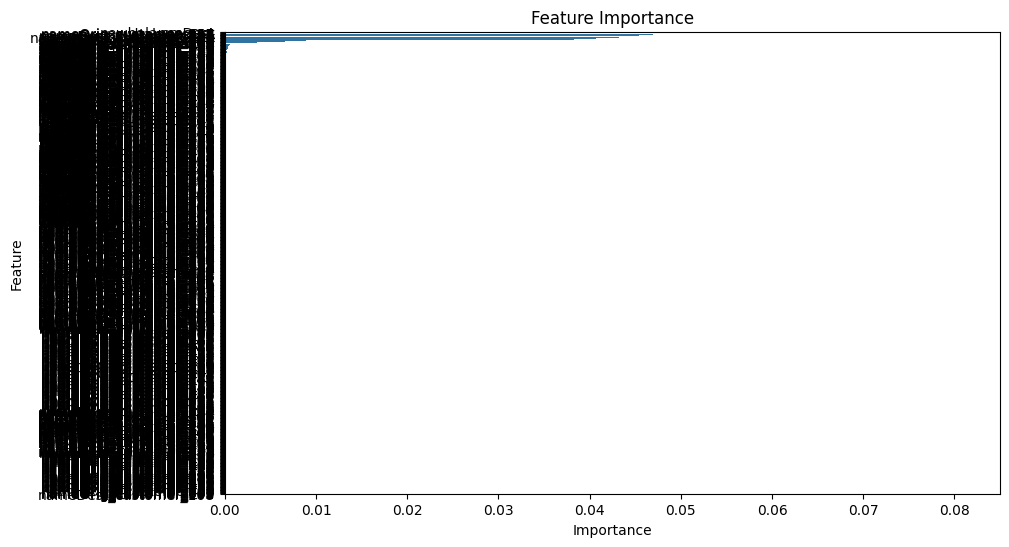

In [37]:
# Step 10: Key Factors Identification
# Feature Importance Analysis
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [38]:
# Step 11: Prevention Plan
# Based on the insights from the model and analysis, you can create a prevention plan

# Key insights:
# - Identify the most important features contributing to fraud detection
# - Focus on improving data quality and gathering more relevant features
# - Consider implementing real-time monitoring for suspicious activities
# - Enhance authentication and authorization processes
# - Collaborate with relevant stakeholders to improve fraud prevention measures

# Actions to take:
# - Implement two-factor authentication for high-risk transactions
# - Enhance monitoring for transactions involving high-importance features
# - Regularly update and improve the model as more data becomes available
# - Collaborate with cybersecurity experts to strengthen overall security measures

# Note: The prevention plan may vary based on specific business requirements and industry regulations.

print("Prevention Plan Summary:")
print("1. Implement two-factor authentication for high-risk transactions.")
print("2. Enhance monitoring for transactions involving high-importance features.")
print("3. Regularly update and improve the model as more data becomes available.")
print("4. Collaborate with cybersecurity experts to strengthen overall security measures.")

# Continue with the rest of your code...
# For example, if you have a web application, you might implement some of these actions in the backend or frontend logic.
# Adjust the code based on the actions you want to take and the nature of your application.


Prevention Plan Summary:
1. Implement two-factor authentication for high-risk transactions.
2. Enhance monitoring for transactions involving high-importance features.
3. Regularly update and improve the model as more data becomes available.
4. Collaborate with cybersecurity experts to strengthen overall security measures.
